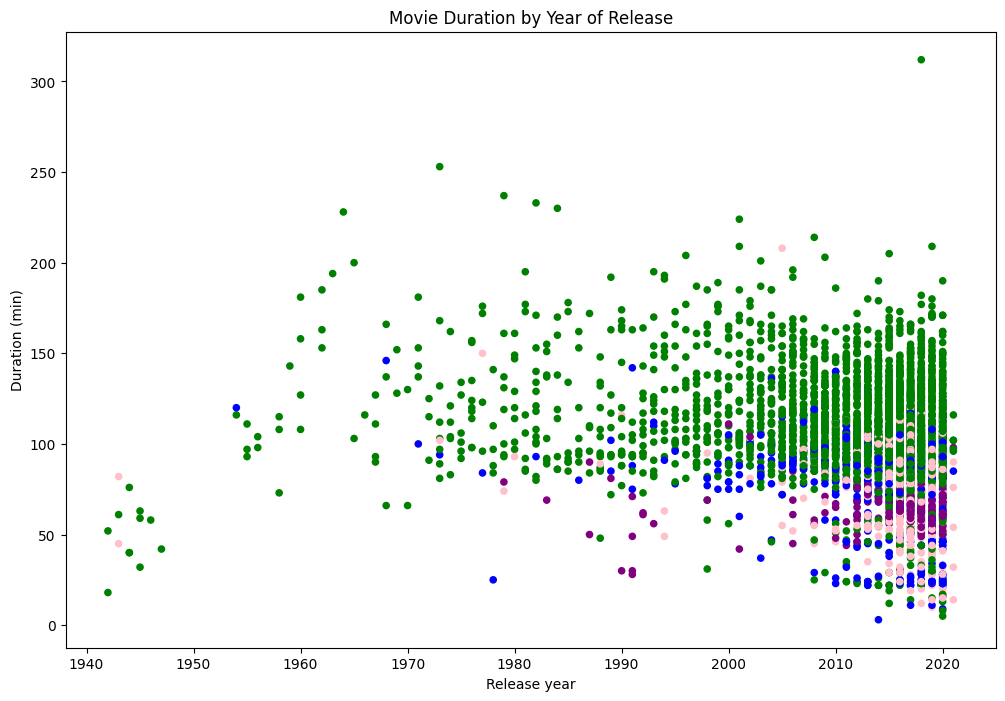

genre
Action                  43.500000
Anime Features          47.333333
Children                34.271028
Classic Movies          42.625000
Comedies                45.800000
Documentaries           44.589404
Dramas                  27.166667
Horror Movies           29.000000
International Movies    41.666667
Music                   54.500000
Stand-Up                53.138889
Uncategorized           34.675000
Name: duration, dtype: float64


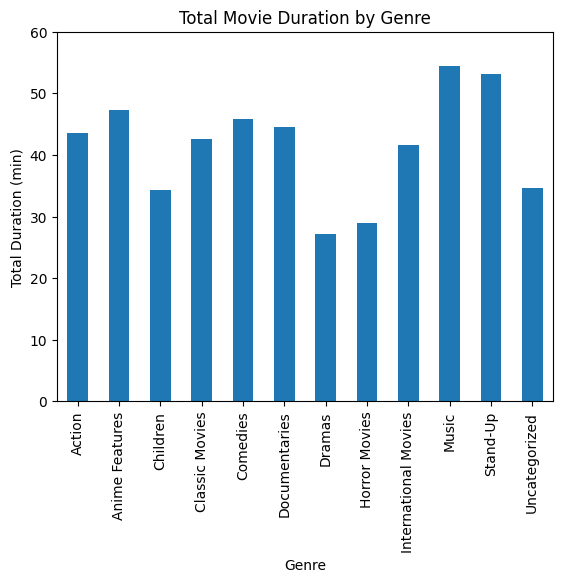

In [120]:
# Importing pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Start coding!

#Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

#Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

#Selecting only columns of interest
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]


#Subsetting movies with duration less than 60 mins
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.sort_values('duration', ascending= False)
short_movies.pivot_table(values= 'duration', index='title')

colors = []
for index, row in netflix_movies.iterrows():
    if row['genre'] == "Children":
        colors.append('b')
    elif row['genre'] == 'Documentaries':
        colors.append('pink')
    elif row['genre'] == 'Stand-Up':
        colors.append('purple')
    else:
        colors.append('g')
        
# colors[:10]
        
netflix_movies.plot(x= 'release_year', y='duration', kind='scatter', xlabel='Release year', ylabel='Duration (min)', title= 'Movie Duration by Year of Release', figsize=(12, 8), c= colors)
plt.show()


# Sum of minutes grouped by genre
movie_genre = short_movies.groupby('genre')['duration'].mean()
print(movie_genre)

# Plotting a bar chart
ax = movie_genre.plot(kind='bar', xlabel='Genre', ylabel='Total Duration (min)', title='Total Movie Duration by Genre')

# Set the y-axis range
ax.set_ylim(0, 60)

plt.show()





Based on these observations, it appears that the duration of movies in the subsequent years may be decreasing, possibly influenced by the shorter attention spans of viewers.